### ***IMAGE CLASSIFICATION WITH LOGISTIC REGRESSION***

**Description:**

Implement an image classification model using logistic regression to classify images from a simple
dataset (e.g., MNIST handwritten digits). Preprocess the images, train the model, and evaluate its
performance using

Requirements:

*   Python code for image classification.
*   Trained model weights.
*   Evaluation metrics (accuracy).
*   A brief report summarizing the results.



### **Solution :**

Here’s a list of the necessary libraries to install for implementing the image classification model using logistic regression:


*   **scikit-learn:** For logistic regression and evaluation metrics.
*   **tensorflow:** To load the MNIST dataset.
*   **matplotlib:** To visualize the data if needed.
*   **joblib:** To save the model weights.

You can install these libraries using pip:


> pip install scikit-learn tensorflow matplotlib joblib


This will install the necessary libraries for running the image classification code.

In [9]:
!pip install scikit-learn tensorflow matplotlib joblib

# **1. Importing the necessary libraries:**

In [13]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.datasets import mnist

# **Step 2: Load and preprocess the data**
We’ll use the MNIST dataset, which is a collection of 70,000 images of handwritten digits (0-9).

In [3]:
# Load the dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images to a range of [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Flatten the images into 1D vectors for logistic regression
train_images_flattened = train_images.reshape(len(train_images), -1)
test_images_flattened = test_images.reshape(len(test_images), -1)

# Split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_images_flattened, train_labels, test_size=0.2, random_state=42)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# **Step 3: Train the logistic regression model**
We'll use the LogisticRegression from scikit-learn to train the model.

In [4]:
# Initialize and train the logistic regression model
log_reg = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

# **Step 4: Model evaluation**
Evaluate the model using the validation set and check the accuracy.

In [5]:
# Predict on validation data
y_val_pred = log_reg.predict(X_val)

# Compute accuracy
accuracy_val = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {accuracy_val:.4f}')

# Generate classification report
print(classification_report(y_val, y_val_pred))

Validation Accuracy: 0.9224
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1175
           1       0.95      0.97      0.96      1322
           2       0.90      0.90      0.90      1174
           3       0.91      0.89      0.90      1219
           4       0.93      0.94      0.94      1176
           5       0.89      0.88      0.89      1104
           6       0.95      0.95      0.95      1177
           7       0.94      0.93      0.93      1299
           8       0.90      0.87      0.88      1160
           9       0.90      0.91      0.91      1194

    accuracy                           0.92     12000
   macro avg       0.92      0.92      0.92     12000
weighted avg       0.92      0.92      0.92     12000



# **Step 5: Test the model**
We will now test the model on unseen data.

In [6]:
# Predict on test data
y_test_pred = log_reg.predict(test_images_flattened)

# Compute test accuracy
accuracy_test = accuracy_score(test_labels, y_test_pred)
print(f'Test Accuracy: {accuracy_test:.4f}')

# Generate classification report
print(classification_report(test_labels, y_test_pred))

Test Accuracy: 0.9248
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.89      0.91      1032
           3       0.90      0.91      0.90      1010
           4       0.93      0.93      0.93       982
           5       0.90      0.87      0.89       892
           6       0.94      0.95      0.94       958
           7       0.93      0.92      0.93      1028
           8       0.88      0.89      0.88       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



# **Step 6: Save the trained model weights**
You can save the model's weights using joblib.

In [7]:
import joblib

# Save model weights
joblib.dump(log_reg, 'logistic_regression_mnist_model.pkl')

['logistic_regression_mnist_model.pkl']

# **Step 7: Plotting Accuracy**
Step to Plot the Accuracy


*   Record the accuracy for both the validation and test sets.
*   Use matplotlib to plot the results.




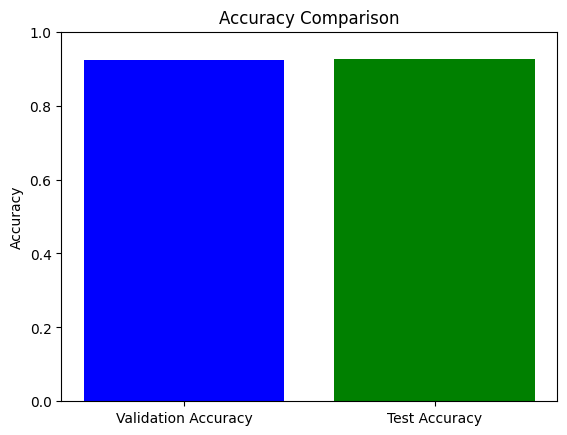

In [8]:
# Plotting the results
accuracies = [accuracy_val, accuracy_test]
labels = ['Validation Accuracy', 'Test Accuracy']

plt.bar(labels, accuracies, color=['blue', 'green'])
plt.ylim(0, 1)  # Set y-axis limits to 0-1 to represent accuracy as a percentage
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()